In [56]:
#Marée Maxime 27361900
#Imports utiles
import matplotlib.pyplot as plt
from pymatgen.ext.matproj import MPRester
from pymatgen.phonon.bandstructure import*
from pymatgen.phonon.plotter import*

# Téléchargement des fichiers CIF

On peut télécharger directement la structure de bandes de phonons avec MPRester via la fonction get_phonon_bandstructure_by_material_id()

In [57]:
#Téléchargement du ficher CIF
with MPRester("rzFNAXwVskd5hQE3") as m:
    phononband = m.get_phonon_bandstructure_by_material_id("mp-961673")

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:455: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:456: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



# Structure de bandes de phonons du TiFeTe  

Dans cette section, on représente la structure de bandes de phonons du TiFeTe

J'utilise la classe PhononBSPlotter qui permet de réprésenter la structure de bandes de phonons

<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

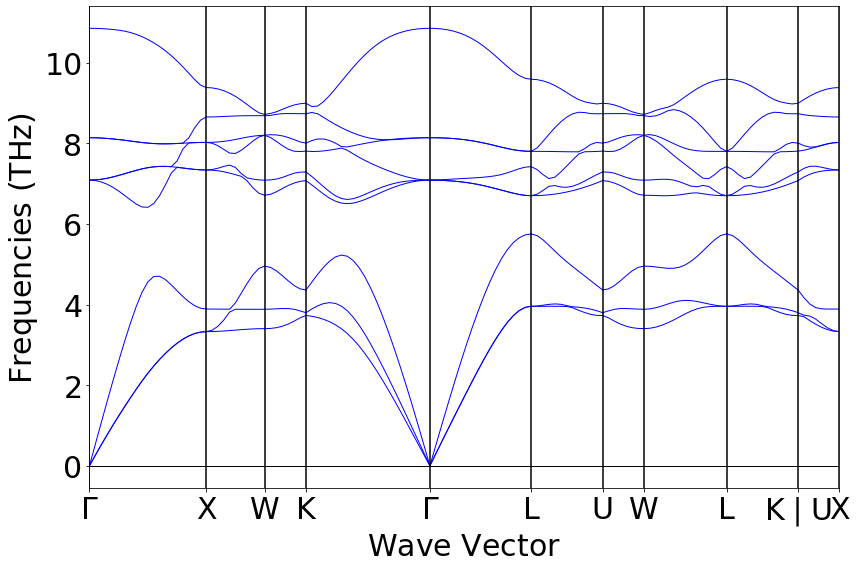

In [58]:
phononplot = PhononBSPlotter(phononband)
phononplot.get_plot()

#### Récupération des données utiles pour la suite

Le dictionnaire $\textbf{datas}$ est rempli des données de la structure de bandes de phonons.

Le tableau $\textbf{distances}$ contient l'ensemble des points importants situés dans une transition de vecteur d'onde c'est donc l'ensemble des points entre deux droites verticales de la structure de bandes de phonons

Le dictionnaire $\textbf{frequency}$ stocke les fréquences de phonons pour chaque transition de vecteur d'onde, ce sont donc les ordonnées associées aux éléments de distances.

In [59]:
datas = phononplot.bs_plot_data()
distances = datas.get('distances')
frequency = datas.get('frequency') 

# Calcul de la vitesse du son 

On nous demande de calculer la vitesse du son pour trois branches acoustiques différentes dans trois directions différentes de la zone de Brillouin.

Pour calculer la vitesse du son, il faut utiliser la relation de dispersion à savoir : $\omega = v_s q$ et on calculera donc la vitesse du son en faisant : $v_s = \frac{\omega}{q}$

Or si on considère de grandes longueurs d'ondes devant la distance interatomique ($|q|$ << $\frac{\pi}{a}$ et donc $qa$->$0$), on observe que la vitesse de phase $\frac{\omega}{q}$ et la vitesse de groupe $\frac{\partial \omega}{\partial q}$ sont égales et indépendantes de $\omega$. 

Comme on a une série de valeurs de distances et de fréquences pour une direction donnée de la première zone de Brillouin, je calcule la vitesse du son comme une vitesse de groupe en calculant la pente $\frac{\Delta \omega}{\Delta q}$ de la structure de bandes de phonons.

#### Représentation des 3 bandes acoustiques 

La première bande acoustique est la bande cyan

La deuxième bande acoustique est la bande verte

La troisième bande acoustique est la bande jaune

On plot également la Zone de Brillouin en dessous de la structure de bandes de phonons.

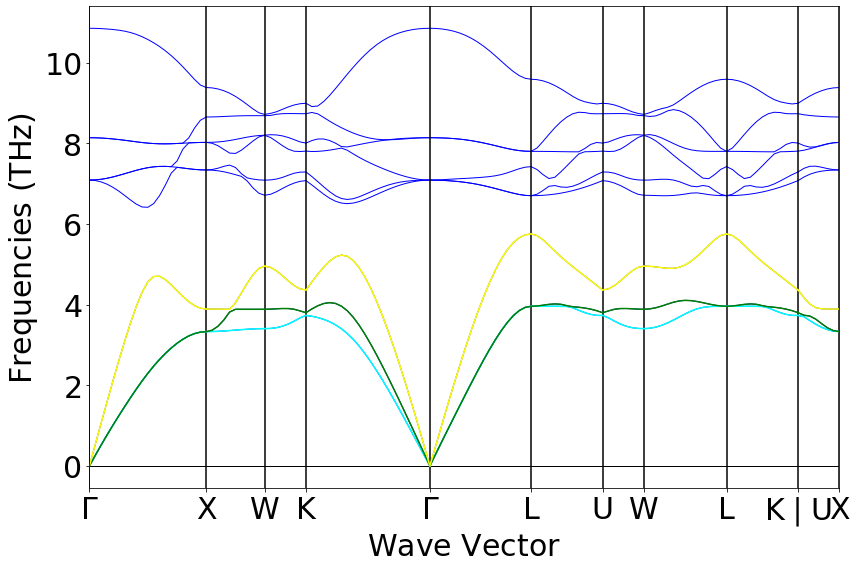

In [60]:
phononplot.get_plot()

for i in range(len(distances)):
    plt.plot(distances[i],frequency[i][0],'cyan')
    plt.plot(distances[i],frequency[i][1],'green')
    plt.plot(distances[i],frequency[i][2],'yellow')

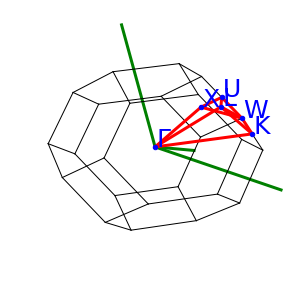

In [61]:
phononplot.plot_brillouin()

### Attention :

Pour le calcul des vitesses, il faut faire attention aux $\textbf{unités}$ des données que l'on récupère :

On a une fréquence $f$ en $THz$ = $10^{12} Hz$

Et on veut une vitesse angulaire au dénominateur, il faut donc multiplier par $2\pi$ pour passer de $Hz$ à $\frac{rad}{s}$

Le dénominateur est le vecteur d'onde et il est exprimé en $\frac{1}{Å} = \frac{1}{10^{-10} m}$, on va donc multiplier le dénominateur par $10^{10}$ et donc le numérateur par $10^{-10}$ pour obtenir une valeur de la vitesse en $[m/s]$.




#### 1) Vitesse du son dans la première branche acoustique dans la direction $\Gamma$ - X

On regarde la bande cyan et la direction $\Gamma$ - X de la première zone de Brillouin

In [79]:
firstdist = distances[0]
firstfreq = frequency[0][0]
firstx = firstdist[-1] - firstdist[0]
firsty = (firstfreq[-1] - firstfreq[0])
first_v = ((abs(firsty)*10**12*10**(-10)*(2*np.pi))/(firstx))
print("La vitesse du son dans la première branche acoustique dans la direction \u0393-X =",first_v,"[m/s]")

La vitesse du son dans la première branche acoustique dans la direction Γ-X = 1935.719313767534 [m/s]


#### 2) Vitesse du son dans la deuxième branche acoustique dans la direction K - $\Gamma$

On regarde la bande verte et la direction K - $\Gamma$

In [80]:
secondist = distances[3]
secondfreq = frequency[3][1]
secondx = secondist[-1] - secondist[0]
secondy = (secondfreq[-1] - secondfreq[0])
second_v = ((abs(secondy)*10**12*10**(-10)*(2*np.pi))/(secondx))
print("La vitesse du son dans la deuxième branche acoustique dans la direction K-\u0393 =",second_v,"[m/s]")

La vitesse du son dans la deuxième branche acoustique dans la direction K-Γ = 2082.3921736356338 [m/s]


#### 3) Vitesse du son dans la troisième branche acoustique dans la direction $\Gamma$-L

On regarde la bande jaune et la direction  $\Gamma$-L

In [81]:
thirddist = distances[4]
thirdfreq = frequency[4][2]
thirdx = thirddist[-1] - thirddist[0]
thirdy = (thirdfreq[-1] - thirdfreq[0])
third_v = ((abs(thirdy)*10**12*10**(-10)*(2*np.pi))/(thirdx))
print("La vitesse du son dans la troisième branche acoustique dans la direction \u0393-L =",third_v,"[m/s]")

La vitesse du son dans la troisième branche acoustique dans la direction Γ-L = 3862.2253329980003 [m/s]


#### Représentation des trois pentes indiquant les vitesses du son 

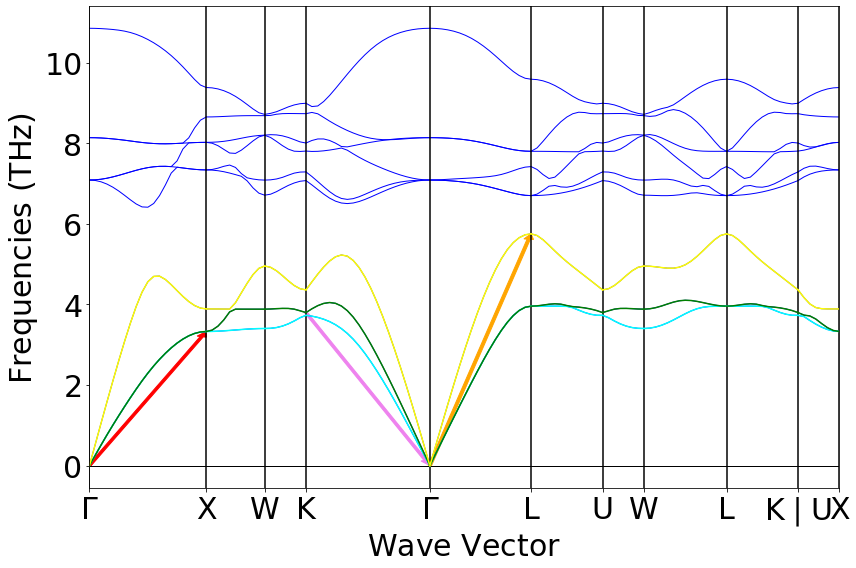

In [76]:
phononplot.get_plot()

for i in range(len(distances)):
    plt.plot(distances[i],frequency[i][0],'cyan')
    plt.plot(distances[i],frequency[i][1],'green')
    plt.plot(distances[i],frequency[i][2],'yellow')

plt.arrow(firstdist[0], firstfreq[0], firstx, firsty, color='red',width = 0.03,length_includes_head =True)
plt.arrow(secondist[0], secondfreq[0], secondx, secondy, color='violet',width = 0.03,length_includes_head =True)
plt.arrow(thirddist[0], thirdfreq[0], thirdx, thirdy, color='orange',width = 0.03,length_includes_head =True)

## Explications

On observe une grande différence de valeur en fonction de la direction choisie et de la bande acoustique choisie. On peut expliquer cette différence par le fait que notre cristal est anisotrope et donc ses propriétés dépendent de la direction dans laquelle on se trouve, par conséquent, la vitesse du son dépend de la direction dans laquelle on se trouve ! 